$\text{IMPORTS}$

In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo

$\textbf{PROBLEM 1:}\\
\max \{x_{12} + x_{22} + x_{23} \} \\
S.T. \\
x_{11} + x_{23} \le 12 \\
x_{11} + x_{12} + x_{13} = 20  \\
x_{21} + x_{22} + x_{23} = 20 \\
x_{11} + x_{21} = 10 \\
x_{12} + x_{22} = 20 \\
x_{13} + x_{23} = 10 \\
x_{ij} \ge 0, \ \forall \ i = 1, 2, \ j = 1, 2, 3$

$$
\textbf{QUESTION 1} \\~\\
\text{Since we have equality constraints and x}\ge 0 \text{ we are bounded.} \\
\text{For example, if } x_{11}, x_{13}, x_{21}, x_{23} \gt 10 \text{, the constraints that contain them are violated}.\\
\text{Similarly, if } x_{12}, x_{22} \gt 20 \text{, the constraints that contain them arae violated.}\\
\text{If P is bounded,  we will have a finite number of extreme points} \Rightarrow \\
\text{Every point is a convex combination of extreme points}.
$$



$$\textbf{QUESTION 2}$$

In [2]:
D = np.array([1, 0, 0, 0, 0, 1])
b = 12
c = np.array([0, 1, 0, 0, 1, 1]).T

print(f"{c=}\n{D=}\n{b=}")

c=array([0, 1, 0, 0, 1, 1])
D=array([1, 0, 0, 0, 0, 1])
b=12


$$\textbf{QUESTION 3}\\~\\
\text{ITERATION 1:}
$$

In [3]:
# Extreme Points
x1 = np.array([10, 10, 0, 0, 10, 10])
x2 = np.array([0, 10, 0, 0, 10, 0])

# Objective Function Coefficients
obj_coeff1 = c @ x1
obj_coeff2 = c @ x2

# Constraint Coefficients
constraint_coeff1 = D @ x1
contraint_coeff2 = D @ x2

print(f"{obj_coeff1=}\n{obj_coeff2=}\n{constraint_coeff1=}\n{contraint_coeff2=}")

obj_coeff1=30
obj_coeff2=20
constraint_coeff1=20
contraint_coeff2=0


$$
\text{RMP:}\\
\max \{30 \lambda_1 + 20 \lambda2\} \\
S.T. \\
20 \lambda_1 + 0 \lambda_2 \le 12 \\
\lambda_1 + \lambda_2 = 1 \\
\lambda_1 \ge 0, \lambda_2 \ free
\\~\\
\textbf{QUESTION 4}
$$

In [4]:
B = np.matrix([[20, 0], [1, 1]])
b_inv = np.linalg.inv(B)

helper = np.array([12, 1])
optimal = b_inv @ helper
lam1_hat, lam2__hat = np.round(optimal[0, 0], 1), np.round(optimal[0, 1], 1)
print(f"The Optimal Solution:\n{optimal}")

The Optimal Solution:
[[0.6 0.4]]



$$\textbf{QUESTION 5}
$$

In [5]:
# Find Optimal Dual Variable (First Way)
c_b = np.array([30, 20])
hat = c_b @ b_inv
y_hat, r_hat = hat[0, 0], hat[0, 1]
print(f"The Optimal Dual Variable (First Way):\n{hat}")

The Optimal Dual Variable (First Way):
[[ 0.5 20. ]]


$$
\text{Find Optimal Dual Variable (Second Way:)}\\
\text{Dual of RMP:}\\
\min \{12 a_1 + 1 a_2 \} \\
S.T. \\
20 a_1 + 1 a_2 \ge 30 \\
0 a_1 + 1 a_2 = 20 \\
a_1 \ge 0, a_2 \ free \\~\\
\text{Therefore by Dual Slackness, we have:} \\
\lambda_1 (20 a_1 + 1 a_2 - 30) = 0 \\ 
\lambda_2 (0 a_1 + 1 a_2 - 20) = 0 \\~\\
\text{We know that } \lambda_1, \lambda_2 \ge 0 \Rightarrow \\
20 a_1 + 1 a_2 - 30 = 0 \\
0 a_1 + 1 a_2 - 20 = 0  \Rightarrow \\
20 a_1 + 1 a_2 = 30 \\
0 a_1 + 1 a_2 = 20 \Rightarrow \\
a_1 = 0.5 \\
a_2 = 20 \\~\\

\textbf{QUESTION 6}\\~\\
\text{We should terminate the Dantzig-Wolfe decomposition algorithm when } Z \le \hat r \\
(SP) = Z = \max \{c^T - \hat y D\} x - \hat r \\
S.T. \\
x \in P
$$

In [6]:
# Solve the (SP)
obj_func_coeffs = c - (y_hat * D)
print(f"{obj_func_coeffs=}")

obj_func_coeffs=array([-0.5,  1. ,  0. ,  0. ,  1. ,  0.5])


$$
w = \max \{c^T - \hat y D\} x \\
w = \max \{-0.5 x_{11} + 1 x_{12} + 0 x_{13} + 0 x_{21} + 1 x_{22} + 0.5 x_{23}\}\\
S.T. \\
x_{11} + x_{12} + x_{13} = 20 \\
x_{21} + x_{22} + x_{23} = 20 \\
x_{11} + x_{21} = 10 \\
x_{12} + x_{22} = 20 \\
x_{13} + x_{23} = 10 \\
x_{ij} \ge 0 \ \forall \ i = 1, 2, \ j = 1, 2, 3
$$

In [7]:
sp_A = np.array([[1, 1, 1, 0, 0, 0], 
                 [0, 0, 0, 1, 1, 1 ], 
                 [1, 0, 0, 1, 0, 0], 
                 [0, 1, 0, 0, 1, 0], 
                 [0, 0, 1, 0, 0, 1]])

sp_c = np.array([0.5, -1, 0, 0, -1, -0.5])

sp_b = np.array([20, 20, 10, 20, 10])

solution_dict = spo.linprog(A_eq=sp_A, b_eq=sp_b, c=sp_c, bounds=(0, None), method='highs')
x3 = solution_dict.x
objective_value = -solution_dict.fun
print(f"{x3=}\n{objective_value=}")

x3=array([ 0., 20.,  0., 10., -0., 10.])
objective_value=25.0


$$
x^3 = [0, 20, 0, 10, 0, 10] \\
Z = w - \hat r = 25 - 20 = 5 \Rightarrow \\
w \gt \hat r \Rightarrow \\
\text{Another iteration is required.} \\
\lambda_3 \text{ enters into the restricted problem.}
$$

In [8]:
# Objective Function Coefficients
obj_coeff3 = c @ x3

# Constraint Coefficients
constraint_coeff3 = D @ x3

print(f"{obj_coeff3=}\n{constraint_coeff3=}")

obj_coeff3=30.0
constraint_coeff3=10.0


$$
\text{NEW RMP:}\\
\max \{30 \lambda_1 + 20 \lambda2\ + 30 \lambda3 \} \\
S.T. \\
20 \lambda_1 + 0 \lambda_2 + 10 \lambda_3 \le 12 \\
\lambda_1 + \lambda_2 + \lambda_3 = 1 \\
\lambda_1 \ge 0, \lambda_2 \ free, \lambda3 \ge 0
$$

In [9]:
l1 = cp.Variable(1)
l2 = cp.Variable(1)
l3 = cp.Variable(1)

expr = 30 * l1 + 20 * l2 + 30 * l3

constraints = [20 * l1 + 0 * l2 + 10 * l3 <= 12,
               l1 + l2 + l3 == 1,
               l1 >= 0,
               l3 >= 0]

obj = cp.Maximize(expr)

stuff = cp.Problem(obj, constraints)

stuff.solve()
print("\nThe optimal value is", round(stuff.value, 2))
print(l1.value, l2.value, l3.value)



The optimal value is 32.0
[1.37277194e-10] [-0.2] [1.2]


In [10]:
B = np.matrix([[0, 10 ], [1, 1]])
b_inv = np.linalg.inv(B)

c_b = np.array([20, 30])
dual_variables = c_b @  b_inv
lam_hat, r_hat = np.round(dual_variables[0, 0], 1), np.round(dual_variables[0, 1], 1)
print(f"Lambda Hat:\n{lam_hat}\n\nR Hat:\n{r_hat}")

Lambda Hat:
1.0

R Hat:
20.0


In [11]:
# Solve second SP
sp_obj_func_coeffs = c - (lam_hat * D)
print(f"{sp_obj_func_coeffs=}")

sp_obj_func_coeffs=array([-1.,  1.,  0.,  0.,  1.,  0.])


$$
\text{Form Next Subproblem:} \\
(SP) = Z = \max \{c^T - \hat y D\} x - \hat r \\
S.T. \\
x \in P \\~\\
w = \max \{c^T - \hat y D\} x \\
w = \max \{-1x_1 + 1x_2 + 0x_3 + 0x_4 + 1x_5 + 0 x_6\} \\
S.T. \\
x_{11} + x_{12} + x_{13} = 20 \\
x_{21} + x_{22} + x_{23} = 20 \\
x_{11} + x_{21} = 10 \\
x_{12} + x_{22} = 20 \\
x_{13} + x_{23} = 10 \\
x_{ij} \ge 0 \ \forall \ i = 1, 2, \ j = 1, 2, 3
$$

In [12]:
new_sp_A = np.array([[1, 1, 1, 0, 0, 0], 
                     [0, 0, 0, 1, 1, 1 ], 
                     [1, 0, 0, 1, 0, 0], 
                     [0, 1, 0, 0, 1, 0], 
                     [0, 0, 1, 0, 0, 1]])

new_sp_c = np.array([1, -1, 0, 0, -1, 0])

new_sp_b = np.array([20, 20, 10, 20, 10])

solution_dict = spo.linprog(A_eq=new_sp_A, b_eq=new_sp_b, c=new_sp_c, bounds=(0, None), method='highs')
x4 = solution_dict.x
new_objective_value = -solution_dict.fun
print(f"{x4=}\n{new_objective_value=}")

x4=array([ 0., 10., 10., 10., 10.,  0.])
new_objective_value=20.0


$$
\text{To Maximize:}\\
x^4 = [0, 10, 10, 10, 10, 0] \Rightarrow \\
w = 20 \le \hat r = 20 \Rightarrow \\
w = r \Rightarrow \\
Z = 0 \Rightarrow \\
 \text{We terminate and say the current solution is optimal for the master problem.}\\~\\
x^* = -0.2x^2 + 1.2x^3 \Rightarrow \\~\\
-0.2 \times [0, 10, 0, 0, 10, 0]^T + 1.2 \times [0, 20, 0, 10, 0, 10]^T \Rightarrow \\~\\
[0, 22, 0, 12, -2, 12]^T
\\~\\
\textbf{QUESTION 7}\\
\text{The 5 equality constraints tell us that we need the sum of transporting supply from warehouse } i \text{ to city } j \text{ to be equal to some value.}
$$

$\textbf{PROBLEM 2:}$
$$\textbf{QUESTION 1}$$



In [20]:
img_data = np.loadtxt("clownImage.txt")


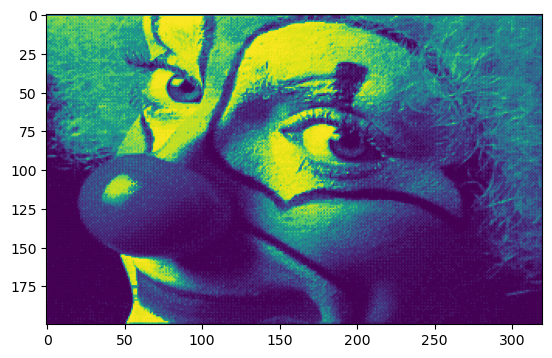

In [14]:
plt.imshow(img_data)

$$\textbf{QUESTION 2}$$

In [15]:
U, s, vh = np.linalg.svd(a=img_data)

$$\textbf{QUESTION 3}$$

In [26]:
m, n, r1, r2, r3 = U.shape[0], vh.shape[0], 5, 15, 25
x5 = (m + n) * (r1 / (m * n))
x15 = (m + n) * (r2 / (m * n))
x25 = (m + n) * (r3 / (m * n))
print(f"{x5=}\n{x15=}\n{x25=}")

x5=0.040625
x15=0.121875
x25=0.203125


$$\textbf{QUESTION 4}$$

In [21]:
x5_img_data = x5 * img_data
x15_img_data = x15 * img_data
x25_img_data = x25 * img_data

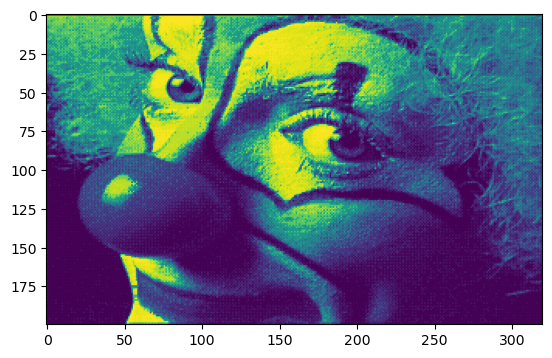

In [22]:
plt.imshow(x5_img_data)

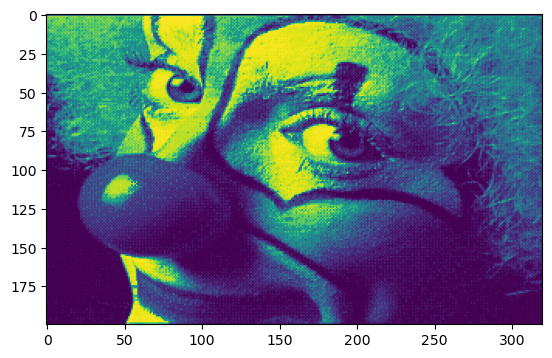

In [23]:
plt.imshow(x15_img_data)

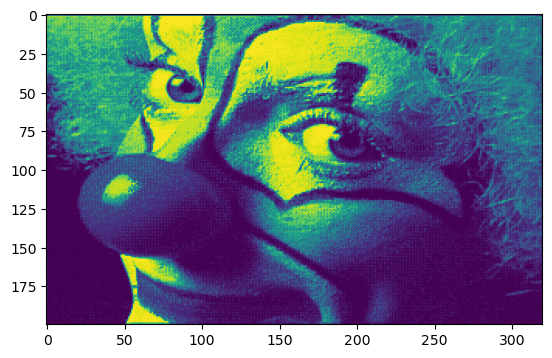

In [24]:
plt.imshow(x25_img_data)